### 모델 성능평가 지표 살펴 보기 => 다중분류
- scikit-learn의 metrics
- pytorch의 torchmetrics
- 

- 모듈로딩 및 데이터 준비<hr>

In [3]:
import torch
import torchmetrics.functional.classification as metrics
import sklearn.metrics as skm
import numpy as np

In [2]:
# 임의의 데이터 준비 : 다중분류 0, 1, 2
target = torch.tensor([2,1,0,0])
pred = torch.tensor([2,1,0,1])

- 성능평가 [1] torchmetrics

In [8]:
# 혼돈행렬(Confusion Matrix)
con = metrics.confusion_matrix(pred, target, task = 'multiclass', num_classes=3)

In [10]:
con
# 혼돈행렬 해석
#   0 1 2 (예측)
# 0 1 1 0
# 1 0 1 0
# 2 0 0 1
# (정답)     => 갯수  ex) 예측을 0으로 했는데 정답이 0인 갯수 : 1
# 재현율은 가로를 기준으로 계산
# 정밀도는 세로를 기준으로 계산
# f1 = ((정밀도 * 재현율) / (정밀도 + 재현율)) * 2

tensor([[1, 1, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [20]:
# micro 경우 즉, 균형 데이터셋
precision = metrics.precision(pred, target, task = 'multiclass', num_classes=3, average='micro')
recall = metrics.recall(pred, target, task = 'multiclass', num_classes=3, average='micro')
f1 = metrics.f1_score(pred, target, task = 'multiclass', num_classes=3, average='micro')
accuracy = metrics.accuracy(pred, target, task = 'multiclass', num_classes=3, average='micro')
# = metrics.multiclass_precision(pred, target, num_classes=3, average='micro')
print(f'Traget ==> {target}')
print(f'Pred ==> {pred}\n')
print(f'[Precision] : {precision}\n[Recall] : {recall}\n[F1_score] : {f1}\n[Accuracy] : {accuracy}')

Traget ==> tensor([2, 1, 0, 0])
Pred ==> tensor([2, 1, 0, 1])

[Precision] : 0.75
[Recall] : 0.75
[F1_score] : 0.75
[Accuracy] : 0.75


In [21]:
# macro 경우 즉, 불균형 데이터셋
precision = metrics.precision(pred, target, task = 'multiclass', num_classes=3, average='macro')
recall = metrics.recall(pred, target, task = 'multiclass', num_classes=3, average='macro')
f1 = metrics.f1_score(pred, target, task = 'multiclass', num_classes=3, average='macro')
accuracy = metrics.accuracy(pred, target, task = 'multiclass', num_classes=3, average='macro')
# = metrics.multiclass_precision(pred, target, num_classes=3, average='macro')
print(f'Traget ==> {target}')
print(f'Pred ==> {pred}\n')
print(f'[Precision] : {precision}\n[Recall] : {recall}\n[F1_score] : {f1}\n[Accuracy] : {accuracy}')

Traget ==> tensor([2, 1, 0, 0])
Pred ==> tensor([2, 1, 0, 1])

[Precision] : 0.8333333730697632
[Recall] : 0.8333333730697632
[F1_score] : 0.7777777910232544
[Accuracy] : 0.8333333730697632


- 성능 평가[2] scikit-learn

In [ ]:
# 혼돈 행렬(Confusion Matrix)

# Tensor => Numpy
target = target.numpy()
pred = pred.numpy()

Confusion : 
[[1 1 0]
 [0 1 0]
 [0 0 1]]


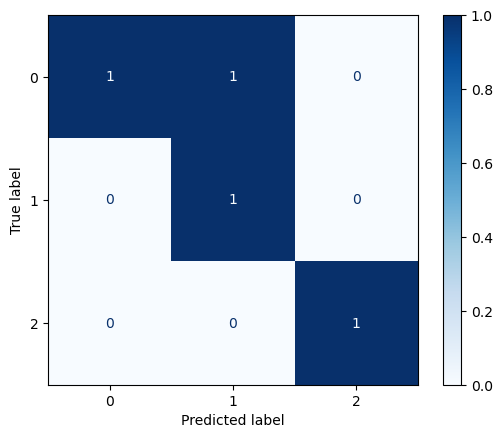

In [27]:
import matplotlib.pyplot as plt
# (정답, 예측)
con = skm.confusion_matrix(target,pred)
print(f'Confusion : \n{con}')
conDi = skm.ConfusionMatrixDisplay(con)
conDi.plot(cmap='Blues')
plt.show()

In [41]:
# 다중 분류 성능분석 출력 - micro 즉, 균형 데이터셋
precision1 = skm.precision_score(target,pred, average='micro')
recall1 = skm.recall_score(target,pred, average='micro')
accuracy1 = skm.accuracy_score(target, pred)
f11 = skm.f1_score(target, pred, average='micro')
report = skm.classification_report(target, pred)
print(f'Traget ==> {target}')
print(f'Pred ==> {pred}\n')
print(f'[Precision] : {precision1}\n[Recall] : {recall1}\n[F1_score] : {f11}\n[Accuracy] : {accuracy1}')
print(f'[Report]\n{report}') 

Traget ==> [2 1 0 0]
Pred ==> [2 1 0 1]

[Precision] : 0.75
[Recall] : 0.75
[F1_score] : 0.75
[Accuracy] : 0.75
[Report]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4


In [40]:
# 다중 분류 성능분석 출력 - macro 즉, 불균형 데이터셋
precision2 = skm.precision_score(target,pred, average='macro')
recall2 = skm.recall_score(target,pred, average='macro')
accuracy2 = skm.accuracy_score(target, pred)
f12 = skm.f1_score(target, pred, average='macro')
report = skm.classification_report(target, pred)
print(f'Traget ==> {target}')
print(f'Pred ==> {pred}\n')
print(f'[Precision] : {precision2}\n[Recall] : {recall2}\n[F1_score] : {f12}\n[Accuracy] : {accuracy2}')
print(f'[Report]\n{report}')

Traget ==> [2 1 0 0]
Pred ==> [2 1 0 1]

[Precision] : 0.8333333333333334
[Recall] : 0.8333333333333334
[F1_score] : 0.7777777777777777
[Accuracy] : 0.75
[Report]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4
